# J Real Estate Development

J Real Estate Development is a developer who is looking to develop in areas that are highly walkable for people. They will begin by survey areas in the state of California, Nebraska , and Washington.  They will then send their results to management to approve their proposals.  If approved, J Real Estate Development will begin the process to develop in that city / town.

# Business Process Flow
Survey and approval process for development projects.



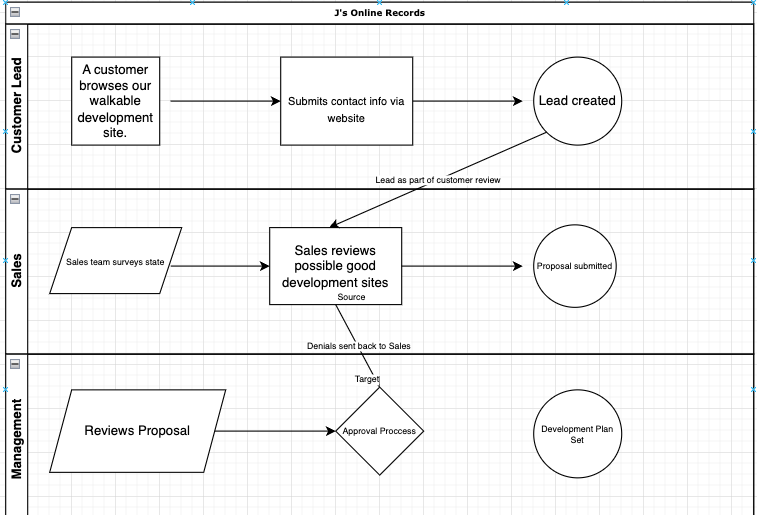

In [15]:
from IPython.display import Image
Image(filename='BusinessProccessFlowChart.png')

## Entity Relationship Diagram
The relationship come from customers, sales team, management, and national walk ability index.

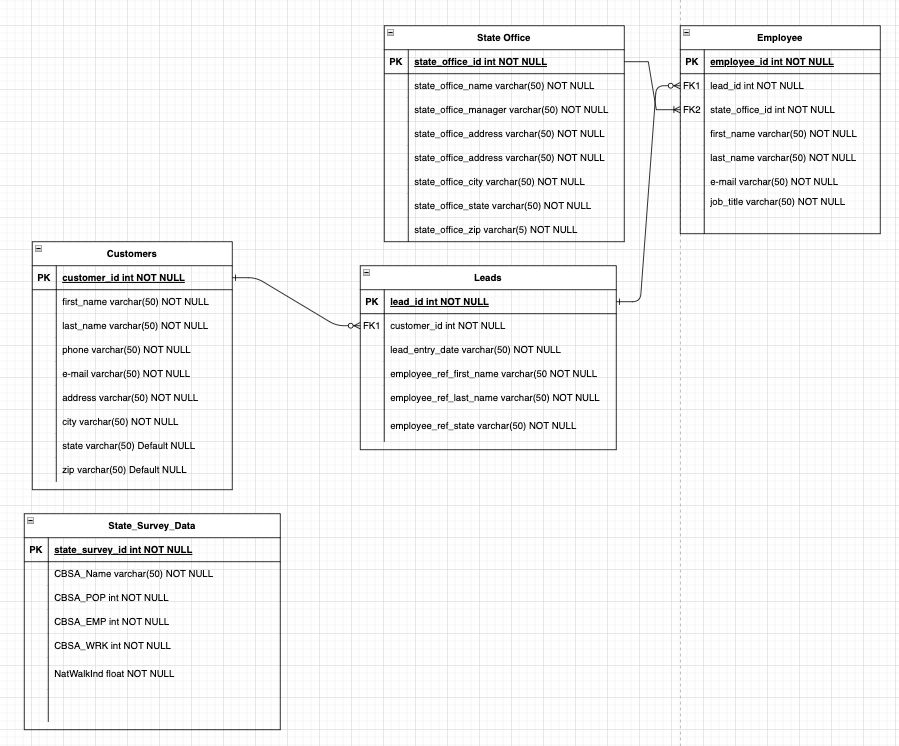

In [16]:
from IPython.display import Image
Image(filename='ERD.png')

## J Real Estate Development Database DDL
Faker.py and data from data.gov was used to generate data. The following tables will be created to collect the necessary data.


CREATE TABLE `customers` (
    `customer_id` int NOT NULL,
    `first_name` varchar(50) NOT NULL,
    `last_name` varchar(50) NOT NULL,
    `phone` varchar(50) NOT NULL,
    `email` varchar(50) NOT NULL,
    `address` varchar(50) NOT NULL,
    `city` varchar(50) NOT NULL,
    `state` varchar(50) DEFAULT NULL,
    `zip` int DEFAULT NULL,
    PRIMARY KEY (`customer_id`)
);

CREATE TABLE `employees` (
    `employee_id` int NOT NULL,
    `first_name` varchar(50) NOT NULL,
    `last_name` varchar(50) NOT NULL,
    `email` varchar(100) NOT NULL,
    `job_title` varchar(10) NOT NULL,
    `state_office_id` int DEFAULT NULL,
    PRIMARY KEY (`employee_id`),
    CONSTRAINT `employees_fk` FOREIGN KEY (`state_office_id`) REFERENCES `state_office` (`state_office_id`)
);

CREATE TABLE `state_office` (
    `state_office_id` int NOT NULL,
    `state_office_name` varchar(50) NOT NULL,
    `state_office_manager` varchar(50) NOT NULL,
    'state_office_address' varchar(50) NOT NULL,
    'state_office_city' varchar(50) NOT NULL,
    'state_office_zip' varchar(5) NOT NULL,
     PRIMARY KEY (`state_no`)
);

CREATE TABLE `state_survey_data` (
    `state_survey_id` int NOT NULL,
    `State` VARCHAR(255) NOT NULL,
    `City` INT NOT NULL,
    `City Population` INT NOT NULL,
    `Avg. Walk Score` INT NOT NULL,
     PRIMARY KEY (`state_survey_id`)
);

CREATE TABLE customer_leads (
    'customer_first_name' VARCHAR(255),
    'customer_last_name' VARCHAR(255),
    'lead_entry_date' DATE,
    'employee_ref_first_name' VARCHAR(255),
    'employee_ref_last_name' VARCHAR(255),
    'employee_ref_state' CHAR(2)
);

#Customers.py


In [17]:
from faker import Faker
import boto3
import pyarrow as pa
import pyarrow.parquet as pq
from io import BytesIO

fake = Faker()
states = ['WA', 'NE', 'CA']
state_cities = {
    'WA': ['Seattle', 'Spokane', 'Tacoma', 'Vancouver', 'Bellevue', 'Kent', 'Everett', 'Renton', 'Spokane Valley', 'Kirkland', 'Federal Way', 'Yakima', 'Bellingham', 'Auburn', 'Kennewick', 'Pasco', 'Redmond', 'Sammamish', 'Marysville', 'South Hill'],
    'NE': ['Omaha', 'Lincoln', 'Bellevue', 'Grand Island', 'Kearney','Fremont','Hastings','Norfolk','Columbus','North Platte','Papillion','La Vista','Scottsbluff','South Sioux City','Beatrice','Chalco','Lexington','Gering','York','Alliance'],
    'CA': ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno','Sacramento','Long Beach','Oakland','Bakersfield','Anaheim','Stockton','Riverside','Santa Ana','Irvine','Chula Vista','Fremont','Santa Clarita','San Bernardino','Modesto','Moreno Valley']
}

def generate_data(num=2000):
    output = []
    for x in range(num):
        state = states[fake.random_int(0,2)]
        city = fake.random_element(state_cities[state])
        output.append({"First Name":fake.first_name(),
                       "Last Name":fake.last_name(),
                       "Phone":fake.phone_number(),
                       "Email":fake.first_name().lower() + '.' + fake.last_name().lower() + '@faker.com',
                       "Address":fake.street_address(),
                       "City":city,
                       "State":state,
                       "Zip Code":fake.zipcode()})
    return pd.DataFrame(output)

def generate_data(num=2000):
    output = []
    for x in range(num):
        state = states[fake.random_int(0,2)]
        city = fake.random_element(state_cities[state])
        output.append({"First Name":fake.first_name(),
                       "Last Name":fake.last_name(),
                       "Phone":fake.phone_number(),
                       "Email":fake.first_name().lower() + '.' + fake.last_name().lower() + '@faker.com',
                       "Address":fake.street_address(),
                       "City":city,
                       "State":state,
                       "Zip Code":fake.zipcode()})
    return pd.DataFrame(output)

df = generate_data()

bucket = "jgpromineo" # your bucket name
parquet_buffer = BytesIO()
table = pa.Table.from_pandas(df)
pq.write_table(table, parquet_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, "fake_customer_data.parquet").put(Body=parquet_buffer.getvalue())

print(df)

     First Name   Last Name                Phone                      Email  \
0      Kathleen       Davis   (272)313-1246x4317        gina.dyer@faker.com   
1        Robert       Ortiz   (445)143-4710x9797  carlos.anderson@faker.com   
2        Joshua     Bradley    079-509-9913x1353   amanda.brennan@faker.com   
3         Kathy     Vincent  +1-679-953-0474x048  michael.mullins@faker.com   
4        Thomas      Arnold         857.954.7776  allison.higgins@faker.com   
...         ...         ...                  ...                        ...   
1995   Nicholas        West         870.227.9193     shelby.davis@faker.com   
1996      Janet  Montgomery         012-249-2984     janice.lynch@faker.com   
1997     Nicole      Cooper         811.053.5284       alec.noble@faker.com   
1998    William       Scott         515-158-5892   susan.castillo@faker.com   
1999      Frank     Collier    852.286.1669x5534    vanessa.jones@faker.com   

                               Address          Cit

#Employees.py

In [16]:
from faker import Faker
import boto3
import pyarrow as pa
import pyarrow.parquet as pq
from io import BytesIO

fake = Faker()
states = ['WA', 'NE', 'CA']
state_cities = {
    'WA': ['Seattle', 'Spokane', 'Tacoma', 'Vancouver', 'Bellevue', 'Kent', 'Everett', 'Renton', 'Federal Way', 'Yakima'],
    'NE': ['Omaha', 'Lincoln', 'Bellevue', 'Grand Island', 'Kearney','Fremont','Hastings','Norfolk','Columbus','North Platte'],
    'CA': ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno','Sacramento','Long Beach','Oakland','Bakersfield','Anaheim']
}

def generate_data(num=30):
    output = []
    for x in range(num):
        state = states[fake.random_int(0,2)]
        city = fake.random_element(state_cities[state])
        output.append({"First Name":fake.first_name(),
                       "Last Name":fake.last_name(),
                       "Phone":fake.phone_number(),
                       "Email":fake.first_name().lower() + '.' + fake.last_name().lower() + '@jred.com',
                       "Address":fake.street_address(),
                       "City":city,
                       "State":state,
                       "Zip Code":fake.zipcode()})
    return pd.DataFrame(output)

df = generate_data()

bucket = "jgpromineo" # your bucket name
parquet_buffer = BytesIO()
table = pa.Table.from_pandas(df)
pq.write_table(table, parquet_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, "fake_employee_data.parquet").put(Body=parquet_buffer.getvalue())

print(df)

   First Name    Last Name                   Phone  \
0   Elizabeth       Miller       982-074-9769x9838   
1     Jessica      Vazquez     +1-499-692-2012x951   
2     Jeffrey         Hall              6981909086   
3       Karen  Christensen        001-188-619-9368   
4   Christina     Atkinson            480-615-5958   
5       Tyler       Jensen   +1-744-294-6202x88907   
6        Leah        Jones           (254)048-1430   
7        Adam        Davis       (336)862-9408x275   
8    Kimberly      Ferrell      (350)168-3217x8260   
9       Scott        Perry    +1-566-306-3494x0135   
10      Maria        Brown              5582245718   
11        Amy      Mathews    001-107-473-4817x090   
12      Julie      Delgado      811.851.0305x24709   
13      James        Wolfe            748-631-8841   
14      Susan       Bailey        001-834-705-4575   
15    Zachary       Werner            648-950-8113   
16   Michelle      Aguilar       121.893.7233x5815   
17     Sydney       Fuller  

#State Office.py

In [6]:
from faker import Faker
import boto3
import pyarrow as pa
import pyarrow.parquet as pq
from io import BytesIO

fake = Faker()
states = ['WA', 'NE', 'CA']
state_cities = {
    'WA': ['Seattle', 'Spokane', 'Tacoma', 'Vancouver', 'Bellevue', 'Kent', 'Everett', 'Renton', 'Federal Way', 'Yakima'],
    'NE': ['Omaha', 'Lincoln', 'Bellevue', 'Grand Island', 'Kearney','Fremont','Hastings','Norfolk','Columbus','North Platte'],
    'CA': ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', '<EUGPSCoordinates>Fresno</EUGPSCoordinates>','Sacramento','Long Beach','Oakland','Bakersfield','Anaheim']
}

def generate_data(num=30):
    output = []
    for x in range(num):
        state = states[fake.random_int(0,2)]
        city = fake.random_element(state_cities[state])
        output.append({"state_office_id":x,
                       "state_office_name":f"{state} Office",
                       "state_office_manager":fake.name(),
                       "state_office_address":fake.street_address(),
                       "state_office_city":city,
                       "state_office_zip":fake.zipcode()})
    return pd.DataFrame(output)

df = generate_data()

bucket = "jgpromineo" # your bucket name
parquet_buffer = BytesIO()
table = pa.Table.from_pandas(df)
pq.write_table(table, parquet_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, "state_office.parquet").put(Body=parquet_buffer.getvalue())

print(df)

    state_office_id state_office_name state_office_manager  \
0                 0         CA Office     Christina Strong   
1                 1         NE Office       Joshua Johnson   
2                 2         CA Office            Ryan Hays   
3                 3         WA Office        Ashley Graham   
4                 4         WA Office      Scott Zimmerman   
5                 5         NE Office      Michael Kennedy   
6                 6         CA Office          Brian Jones   
7                 7         WA Office       Debbie Simpson   
8                 8         WA Office      Samantha Hebert   
9                 9         WA Office       Elizabeth King   
10               10         CA Office        Kristin Lewis   
11               11         CA Office     Rebecca Williams   
12               12         NE Office     Caroline Edwards   
13               13         NE Office      Joseph Callahan   
14               14         NE Office        Nathan Coffey   
15      

#Average Walk Score
Data gathered from WalkScore.com and inputed into a .csv file.  The file is then imported to S3.

In [20]:
# Set the name of the bucket and the file to upload
bucket_name = 'jgpromineo'
file_name = 'WalkScore.csv'

# Create an S3 client
s3 = boto3.client('s3')

# Upload the file to the specified bucket
s3.upload_file(file_name, bucket_name, file_name)

#Customer Leads.py

In [13]:
import boto3
import pandas as pd
from datetime import datetime, timedelta
from random import randrange
from io import BytesIO

s3 = boto3.client('s3')
bucket = 'jgpromineo'
employee_key = 'fake_employee_data.parquet'
customer_key = 'fake_customer_data.parquet'
customer_leads_key = 'customer_leads.parquet'

# Create new DataFrame with specified columns
columns = ['customer_first_name', 'customer_last_name', 'lead_entry_date', 'employee_ref_first_name', 'employee_ref_last_name', 'employee_ref_state']
customer_leads = pd.DataFrame(columns=columns)

# Generate fake data for lead_entry_date column
num_rows = 10  # specify the number of rows you want to generate
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
date_range = (end_date - start_date).days
customer_leads['lead_entry_date'] = [start_date + timedelta(days=randrange(date_range)) for _ in range(num_rows)]

# Read data from Employee table
obj = s3.get_object(Bucket=bucket, Key=employee_key)
employee_data = pd.read_parquet(BytesIO(obj['Body'].read()))

# Fill in employee_ref columns with data from Employee table
customer_leads['employee_ref_first_name'] = employee_data['First Name'][:num_rows]
customer_leads['employee_ref_last_name'] = employee_data['Last Name'][:num_rows]
customer_leads['employee_ref_state'] = employee_data['State'][:num_rows]

# Read data from Customer table
obj = s3.get_object(Bucket=bucket, Key=customer_key)
customer_data = pd.read_parquet(BytesIO(obj['Body'].read()))

# Fill in customer_first_name and customer_last_name columns with data from Customer table
customer_leads['customer_first_name'] = customer_data['First Name'][:num_rows]
customer_leads['customer_last_name'] = customer_data['Last Name'][:num_rows]

# Write customer_leads data to S3 bucket
buffer = BytesIO()
customer_leads.to_parquet(buffer, engine='pyarrow')
s3.put_object(Bucket=bucket, Key=customer_leads_key, Body=buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'RZNBAVTY0ZHY9F5P',
  'HostId': '8gYCu+TYRD7hhtpWLMcwBB0GDYVnA81g5bomkwZIadG8G/ZZ1mq33jD2rFqGVkv5ouP4gT9cnKgib2TduphCCQ==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '8gYCu+TYRD7hhtpWLMcwBB0GDYVnA81g5bomkwZIadG8G/ZZ1mq33jD2rFqGVkv5ouP4gT9cnKgib2TduphCCQ==',
   'x-amz-request-id': 'RZNBAVTY0ZHY9F5P',
   'date': 'Wed, 07 Jun 2023 19:00:02 GMT',
   'x-amz-version-id': 'WgHxUU5DuArGwbx2.9KTM.EzdeRn5pdZ',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"7a031c1204974b71f4cb1c996849feea"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"7a031c1204974b71f4cb1c996849feea"',
 'ServerSideEncryption': 'AES256',
 'VersionId': 'WgHxUU5DuArGwbx2.9KTM.EzdeRn5pdZ'}

#Customer Leads' Verified

In [17]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node S3 bucket
S3bucket_node1 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://jgpromineo/Data/Customer_leads/"],
        "recurse": True,
    },
    transformation_ctx="S3bucket_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=S3bucket_node1,
    mappings=[
        ("customer_first_name", "string", "customer_first_name", "string"),
        ("customer_last_name", "string", "customer_last_name", "string"),
        ("lead_entry_date", "timestamp", "lead_entry_date", "timestamp"),
        ("employee_ref_first_name", "string", "employee_ref_first_name", "string"),
        ("employee_ref_last_name", "string", "employee_ref_last_name", "string"),
        ("employee_ref_state", "string", "employee_ref_state", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node Verified_Customer_Leads
Verified_Customer_Leads_node3 = glueContext.write_dynamic_frame.from_catalog(
    frame=ApplyMapping_node2,
    database="jgcapstone",
    table_name="customer_leads",
    additional_options={
        "enableUpdateCatalog": True,
        "updateBehavior": "UPDATE_IN_DATABASE",
    },
    transformation_ctx="Verified_Customer_Leads_node3",
)

job.commit()


ModuleNotFoundError: No module named 'awsglue'

#Average Walk Score Verified

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node S3 bucket
S3bucket_node1 = glueContext.create_dynamic_frame.from_options(
    format_options={"quoteChar": '"', "withHeader": True, "separator": ","},
    connection_type="s3",
    format="csv",
    connection_options={"paths": ["s3://jgpromineo/Data/WalkScore/"], "recurse": True},
    transformation_ctx="S3bucket_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=S3bucket_node1, mappings=[], transformation_ctx="ApplyMapping_node2"
)

# Script generated for node Verified Walk Score
VerifiedWalkScore_node3 = glueContext.write_dynamic_frame.from_catalog(
    frame=ApplyMapping_node2,
    database="jgcapstone",
    table_name="walkscore",
    additional_options={
        "enableUpdateCatalog": True,
        "updateBehavior": "UPDATE_IN_DATABASE",
    },
    transformation_ctx="VerifiedWalkScore_node3",
)

job.commit()
